In [3]:
#import packages
import pandas as pd
import os
#อ่านไฟล์ csv
df = pd.read_csv(os.path.join('dataset','processed','curated_datahacat.csv'), index_col='LigandID')
df

,canonical_smiles,class
LigandID,,
CHEMBL4794117,C=C1c2cc3c(cc2OC1(F)F)[C@@H](NC(C)=O)CCc1cc(OC...,1
CHEMBL4800456,C=C1COc2cc3c(cc21)-c1c(cc(OC)c(OC)c1OC)CC[C@@H...,1
CHEMBL4753994,COc1cc2c(c(OC)c1OC)-c1cc3c(C)coc3cc1[C@@H](NC(...,1
CHEMBL4797732,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
CHEMBL4743585,C/C=C/C=C/C(=O)OCC(=O)N[C@H]1CCc2cc(OC)c(OC)c(...,1
...,...,...
CHEMBL4549879,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1CCN(c2cc3c(cc...,0
CHEMBL4591601,COc1ccc(/C=C2\NC(=O)N(CCCCN3CCN(c4cccc(Cl)c4Cl...,0
CHEMBL4067470,NS(=O)(=O)c1cc(-c2nnc(Cn3cc(-c4ccccc4)nn3)o2)c...,0


In [4]:
from padelpy import padeldescriptor
#calculate fingerprints
def fingerprint(df, canonical_smiles):
    df[canonical_smiles].to_csv('smilespubchem.smi',sep='\t', index=False, header=False)
    fingerprint_output_file = 'figerprintspubchem.csv'
    padeldescriptor(mol_dir='smilespubchem.smi',
                    d_file=fingerprint_output_file,
                    descriptortypes= 'pubchemFingerprinter.xml',
                    retainorder=True, 
                    removesalt=True,
                    threads=2,
                    detectaromaticity=True,
                    standardizetautomers=True,
                    standardizenitro=True,
                    fingerprints=True
                    )


df_fingerprint = fingerprint(df, 'canonical_smiles')

In [5]:
Fingerprint = pd.read_csv('figerprintspubchem.csv').set_index(df.index)
Fingerprint = Fingerprint.drop('Name', axis=1)
Fingerprint = Fingerprint.dropna(axis=1)
Fingerprint_xy = pd.concat([Fingerprint, df['class']], axis=1)
Fingerprint_xy

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,class
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4794117,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
CHEMBL4800456,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
CHEMBL4753994,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
CHEMBL4797732,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
CHEMBL4743585,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4549879,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4591601,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4067470,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#import 
from pca import pca
#run pca
pca_model = pca(n_components=2, multipletests=None)
pca_dict = pca_model.fit_transform(Fingerprint)
pca_dict

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [881] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3    PubchemFP4  \
 PC1    0.013898    0.017041   -0.010127   -0.007351  1.090223e-21   
 PC2    0.017177    0.009576    0.023796    0.001052  2.614588e-20   
 
        PubchemFP5    PubchemFP6    PubchemFP7    PubchemFP8    PubchemFP9  \
 PC1 -1.762187e-21  1.149799e-23 -4.976123e-23 -3.072653e-22  1.594438e-23   
 PC2 -3.723204e-20  5.832669e-21 -2.515618e-22 -3.616395e-21  2.246872e-22   
 
      ...  PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  \
 PC1  ...           0.0           0.0           0.0           0.0   
 PC2  ...           0.0           0.0           0.0           0.0   
 
      PubchemFP875  PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  \
 PC1           0.0           0.0           0.0           0.0           0.0   
 PC2           0.0           0.0           0.0           0.0           0.0   
 
      PubchemFP880  
 PC1           0.0  
 PC2           0.0  
 
 [2 rows x 881 columns],
 'PC'

In [7]:
#extract score
pca_score = pd.DataFrame.from_dict(pca_dict['PC']).set_index(Fingerprint.index)
pca_score

,PC1,PC2
LigandID,,
CHEMBL4794117,-4.371797,-2.909402
CHEMBL4800456,-4.480393,-2.994438
CHEMBL4753994,-4.764753,-3.882868
CHEMBL4797732,-4.969585,-4.162850
CHEMBL4743585,-5.312766,-3.789708
...,...,...
CHEMBL4549879,-1.318245,0.933357
CHEMBL4591601,-1.224230,-1.838579
CHEMBL4067470,2.678218,-0.372398


In [8]:
#ใส่ class
pca_score_class = pd.concat([pca_score, df['class']], axis=1)
pca_score_class

,PC1,PC2,class
LigandID,,,
CHEMBL4794117,-4.371797,-2.909402,1
CHEMBL4800456,-4.480393,-2.994438,1
CHEMBL4753994,-4.764753,-3.882868,1
CHEMBL4797732,-4.969585,-4.162850,1
CHEMBL4743585,-5.312766,-3.789708,1
...,...,...,...
CHEMBL4549879,-1.318245,0.933357,0
CHEMBL4591601,-1.224230,-1.838579,0
CHEMBL4067470,2.678218,-0.372398,0


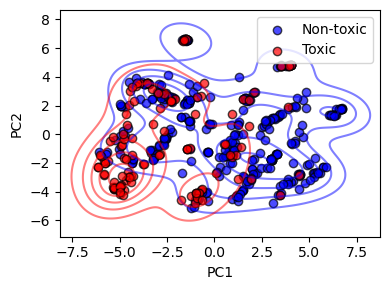

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Data plotting
fig = plt.figure(figsize=(4, 3))

nontoxic = pca_score_class[pca_score_class['class'] == 0]
toxic = pca_score_class[pca_score_class['class'] == 1]

plt.scatter(nontoxic['PC1'], nontoxic['PC2'], c='blue', alpha=0.7, edgecolors='black', label='Non-toxic')
plt.scatter(toxic['PC1'], toxic['PC2'], c='red', alpha=0.7, edgecolors='black', label='Toxic')

def plot_kde_region(tsne_data, mask, colors='black'):
    subset = tsne_data[mask].values

    # Check that data is 2D
    if subset.shape[1] != 2:
        raise ValueError("Data is not 2D!")

    # Add a slight jitter to the data
    subset += np.random.normal(0, 0.01, subset.shape)  # Add jitter

    # Generate grid for KDE
    x_grid = np.linspace(subset[:, 0].min() - 2, subset[:, 0].max() + 2, 500)
    y_grid = np.linspace(subset[:, 1].min() - 2, subset[:, 1].max() + 2, 500)
    X, Y = np.meshgrid(x_grid, y_grid)

    # Compute the KDE
    kde = gaussian_kde(subset.T)
    Z = kde.evaluate(np.vstack([X.ravel(), Y.ravel()]))
    Z = Z.reshape(X.shape)

    # Plot contour
    plt.contour(X, Y, Z, levels=5, colors=colors, alpha=0.5)

# Highlight the region for the Fingerprint dataset
plot_kde_region(pca_score, pca_score_class['class'] == 0, colors='blue')  # For class 0
plot_kde_region(pca_score, pca_score_class['class'] == 1, colors='red')  # For class 1

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('PC1_vs_PC2pubchem.png', dpi=500)
plt.show()

In [14]:
Fingerprint

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4794117,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4800456,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4753994,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4797732,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4743585,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4549879,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4591601,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4067470,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
!pip install -U scikit-learn

In [21]:
#ลด feature ที่เป็น constants
from sklearn.model_selection import train_test_split
import custom_preprocess as cp

x_train, y_train, x_test, y_test = train_test_split(Fingerprint, Fingerprint_xy['class'], test_size=0.3, 
random_state=0)
x_train_reduce = cp.remove_constant_string_des(x_train)
x_train_reduce

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,...,PubchemFP826,PubchemFP827,PubchemFP828,PubchemFP829,PubchemFP832,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP839,PubchemFP860
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4867517,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4516379,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4465959,0,0,0,0,1,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
CHEMBL4068254,1,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
CHEMBL4468581,1,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3613525,1,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
CHEMBL4129553,1,1,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
CHEMBL4435217,1,1,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
def remove_highly_correlated_features(df, threshold=0.7):
    # Compute pairwise correlation of columns
    corr_matrix = df.corr().abs()
    # Create a mask for the upper triangle
    upper = corr_matrix.where(
        pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool), 
                     index=corr_matrix.index, columns=corr_matrix.columns)
    )
    # Identify columns to drop based on threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop the columns from the DataFrame
    df_dropped = df.drop(columns=to_drop)
    return df_dropped

In [33]:
#ถ้า 0.9 จะตัดออกไปเยอะกว่า
import numpy as np
x_train_reduce = remove_highly_correlated_features(x_train_reduce, threshold=0.7)
        

In [34]:
x_train_reduce

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,...,PubchemFP750,PubchemFP751,PubchemFP752,PubchemFP756,PubchemFP757,PubchemFP758,PubchemFP762,PubchemFP763,PubchemFP769,PubchemFP776
LigandID,,,,,,,,,,,,,,,,,,,,,
CHEMBL4867517,1,1,0,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4516379,0,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
CHEMBL4465959,0,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
CHEMBL4068254,1,0,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4468581,1,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3613525,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4129553,1,1,0,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4435217,1,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0


In [39]:
!pip uninstall scikit-learn


In [ ]:
!pip install scikit-learn==1.0.2

In [38]:
from sklearn.ensemble import RandomForestClassifier
#select x test
x_test_reduce = x_test[x_train_reduce.columns]
#model construction
model = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train_reduce, y_train)
#check accuracy
print('Train Accuracy:', model.score(x_train_reduce, y_train))
print('Test Accuracy:', model.score(x_test_reduce, y_test))

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py)